### EDA - Titanic and Amex Datasets

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)
sns.set(rc = {'figure.figsize':(10,8)})

In [3]:
# plot 2 numerical
def numerical_plot(df, num_col1, num_col2):
    plt.plot(df[num_col1], df[num_col2])
    plt.xlabel(num_col1)
    plt.ylabel(num_col2)
    plt.show()

In [4]:
# plot a numeric and a categoric
def num_cat_plot(df, num_col, cat_col):
    sns.stripplot(x=df[cat_col], y=df[num_col], data=df)
    plt.xlabel(cat_col)
    plt.ylabel(num_col)
    plt.show()

In [5]:
# plot two numerics and a categoric
def num2_cat_plot(df, num_col1, num_col2, cat_col):
    sns.scatterplot(data = df, x = num_col1,y = num_col2, hue = cat_col )
    plt.show()

In [6]:
# plot a numeric and two categorics
def num_cat2_plot(df, num_col, cat_col1, cat_col2):
    sns.stripplot(x=df[cat_col1], y=df[num_col], hue = df[cat_col2], data=df)
    plt.xlabel(cat_col1)
    plt.ylabel(num_col)
    plt.show()

In [7]:
# check  null values of a column
def null_check(df, col):
    nul = df[col].isnull().sum()
    return nul

In [8]:
# check cardinality of a column
def cardinality(df, cat):
    for i in cat:
        x = df[i].nunique()
        if x*100/len(df) >= 70:
            print(i," : High Cardinality : ", x)
        else:
            print(i," : Low Cardinality : ", x)

In [9]:
train1 = pd.read_csv("../input/titanic/train.csv")

In [10]:
train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
train1.shape

(891, 12)

In [13]:
# total no. of duplicates
train1.duplicated().sum()

0

In [14]:
# to check datatype of each column
train1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# categorical Columns
cat = ['PassengerId', 'Survived', 'Pclass']
obj = train1.select_dtypes(include=['object']).columns
for i in obj:
    cat.append(i)
    
cat

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Ticket',
 'Cabin',
 'Embarked']

In [16]:
# converting datatype
for i in cat:
    train1[i] = train1[i].astype('category')

In [17]:
train1.dtypes

PassengerId    category
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [18]:
# checking null values
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# in percentages
train1.isnull().sum()*100/len(train1)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [20]:
# dropping columns - nearly 50% missing values
train1.drop(['Cabin'] , axis = 1 , inplace = True)

In [21]:
train1.shape

(891, 11)

In [22]:
cat.remove('Cabin')
cat

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked']

In [23]:
train1[cat].describe()

,PassengerId,Survived,Pclass,Name,Sex,Ticket,Embarked
count,891,891,891,891,891,891,889
unique,891,2,3,891,2,681,3
top,1,0,3,"Abbing, Mr. Anthony",male,1601,S
freq,1,549,491,1,577,7,644


In [24]:
train1.describe().round(2)

,Age,SibSp,Parch,Fare
count,714.00,891.00,891.00,891.00
mean,29.70,0.52,0.38,32.20
std,14.53,1.10,0.81,49.69
min,0.42,0.00,0.00,0.00
25%,20.12,0.00,0.00,7.91
50%,28.00,0.00,0.00,14.45
75%,38.00,1.00,0.00,31.00
max,80.00,8.00,6.00,512.33


In [25]:
train1.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [26]:
cardinality(train1, cat)

PassengerId  : High Cardinality :  891
Survived  : Low Cardinality :  2
Pclass  : Low Cardinality :  3
Name  : High Cardinality :  891
Sex  : Low Cardinality :  2
Ticket  : High Cardinality :  681
Embarked  : Low Cardinality :  3


<AxesSubplot:>

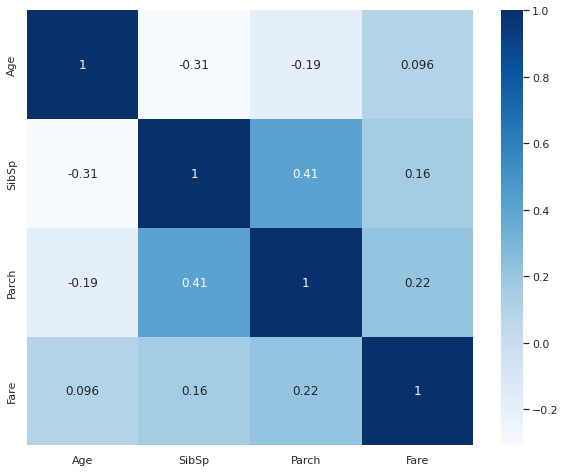

In [27]:
sns.heatmap(train1.corr(), cmap="Blues", annot=True)

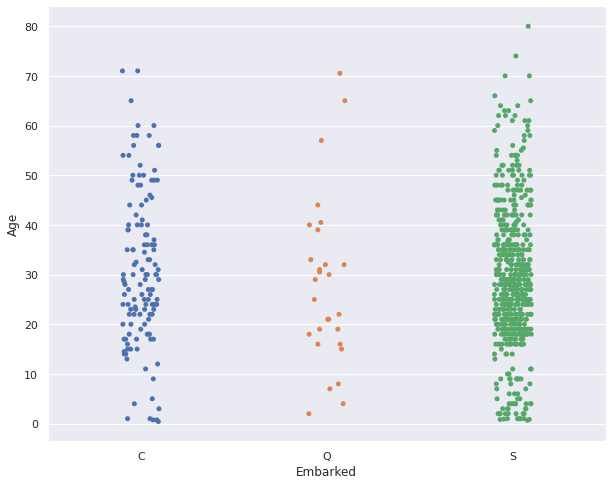

In [28]:
num_cat_plot(train1, 'Age', 'Embarked')

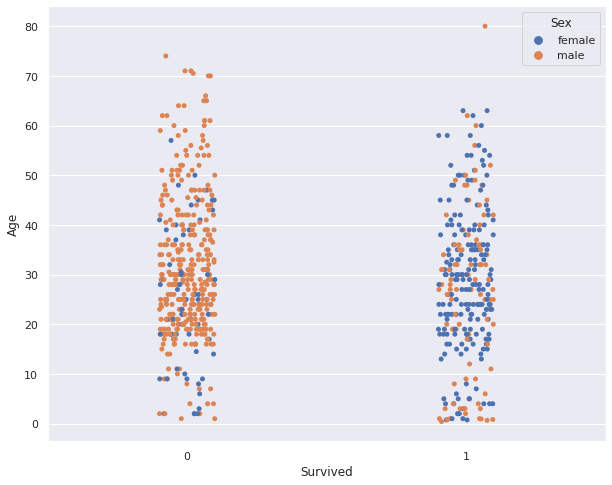

In [30]:
num_cat2_plot(train1, 'Age', 'Survived', 'Sex')

In [31]:
train2 = pd.read_csv("../input/amex-default-prediction/train_data.csv", nrows = 200000)

In [32]:
train2.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [33]:
train2.duplicated().sum()

0

In [34]:
train2.dtypes

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 190, dtype: object

In [35]:
category = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [36]:
#converting the datatypes

for i in category:
    train2[i] = train2[i].astype('category')

In [37]:
#converting the datatypes
train2['customer_ID'] = train2['customer_ID'].astype('category')
train2['S_2'] = pd.to_datetime(train2['S_2'])

In [38]:
numerical_list = train2.select_dtypes(include = ['int','float64']).columns
categoric_list = train2.select_dtypes(include = ['category','datetime64[ns]']).columns

In [39]:
train2[categoric_list].describe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,customer_ID,S_2,D_63,D_64,D_66,D_68,B_30,B_38,D_114,D_116,D_117,D_120,D_126
count,200000,200000,200000,191960,22180.0,192128.0,199928.0,199928.0,193655.0,193655.0,193655.0,193655.0,195775.0
unique,16576,396,6,4,2.0,7.0,3.0,7.0,2.0,2.0,7.0,2.0,3.0
top,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-17 00:00:00,CO,O,1.0,6.0,0.0,2.0,1.0,0.0,-1.0,0.0,1.0
freq,13,933,148773,105870,21951.0,100010.0,169651.0,69185.0,119921.0,193429.0,52208.0,170250.0,154085.0
first,NaN,2017-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
train2.describe().round(2)

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,198458.00,200000.00,200000.00,199928.00,200000.00,162335.00,199928.00,199928.00,29193.00,139942.00,...,7186.00,7186.00,7186.00,196497.00,198581.00,196497.00,34356.00,196497.00,198567.00,196497.00
mean,0.65,0.15,0.13,0.62,0.08,0.23,0.06,0.13,0.18,0.16,...,0.25,0.01,0.16,0.18,0.03,0.17,0.39,0.18,0.05,0.06
std,0.25,0.27,0.21,0.40,0.23,0.20,0.21,0.23,0.22,0.22,...,0.21,0.10,0.26,0.38,0.14,0.35,0.24,0.38,0.19,0.19
min,-0.38,0.00,-0.90,0.00,0.00,-0.25,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00,0.00,0.00
25%,0.48,0.00,0.01,0.10,0.00,0.13,0.00,0.01,0.04,0.04,...,0.01,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00
50%,0.69,0.01,0.03,0.81,0.01,0.16,0.01,0.01,0.12,0.09,...,0.25,0.01,0.01,0.01,0.01,0.01,0.38,0.01,0.01,0.01
75%,0.86,0.24,0.13,1.00,0.01,0.26,0.01,0.16,0.25,0.19,...,0.26,0.01,0.50,0.01,0.01,0.01,0.57,0.01,0.01,0.01
max,1.01,5.33,1.32,1.01,2.51,2.92,6.80,1.63,3.25,9.09,...,1.51,1.01,1.51,1.01,1.01,1.17,1.75,1.01,1.34,4.28


In [41]:
cardinality(train2, categoric_list)

customer_ID  : Low Cardinality :  16576
S_2  : Low Cardinality :  396
D_63  : Low Cardinality :  6
D_64  : Low Cardinality :  4
D_66  : Low Cardinality :  2
D_68  : Low Cardinality :  7
B_30  : Low Cardinality :  3
B_38  : Low Cardinality :  7
D_114  : Low Cardinality :  2
D_116  : Low Cardinality :  2
D_117  : Low Cardinality :  7
D_120  : Low Cardinality :  2
D_126  : Low Cardinality :  3
